<a href="https://colab.research.google.com/github/jongchan1514/keras/blob/main/IMDB_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install keras

# 케라스에서 MNIST 데이터셋 준비하기

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape
len(train_images)

11493376/11490434 [==============================] - 0s 0us/step


60000

# IMDB 데이터셋

In [15]:
#인터넷 영화 데이터베이스
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

#정수 인덱스와 단어를 매핑하도록 뒤집기
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

#리뷰 디코딩
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [16]:
#신경망에 주입 할 데이터준비 one-hot vector
import numpy as np

def vectorrize_sequences(sequences, dimension=10000):
  #크기가 len(sequences), dimension 이고 모든 원소가 0인 행렬생성
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    #results[i]에서 특정인덱스의 위치를 1로만들기
    results[i, sequences] = 1.
  return results

#훈련데이터를 벡터로 변환
x_train = vectorrize_sequences(train_data)

#테스트데이터를 벡터로 변환
x_test = vectorrize_sequences(test_data)

In [ ]:
#샘플
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#옵티마이저 설정
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


#손실과 측정을 함수객체로 지정
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
#훈련검증 세트준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.6117 - acc: 0.6782 - val_loss: 0.4098 - val_acc: 0.8597
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3407 - acc: 0.9030 - val_loss: 0.3120 - val_acc: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2415 - acc: 0.9260 - val_loss: 0.2871 - val_acc: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1889 - acc: 0.9401 - val_loss: 0.3048 - val_acc: 0.8755
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1527 - acc: 0.9511 - val_loss: 0.2773 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1225 - acc: 0.9644 - val_loss: 0.2882 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1023 - acc: 0.9708 - val_loss: 0.3031 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0853 - a

In [ ]:
#history객체 확인
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

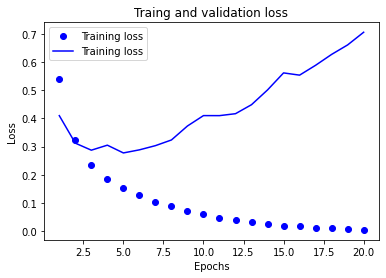

In [ ]:
#훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

#bo 는 파란색 점 b는 파란실선 의미
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Training loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

훈련손실이 Epochs 마다 감소하며 훈련 정확도는 Epochs마다 증가하는것을 확인

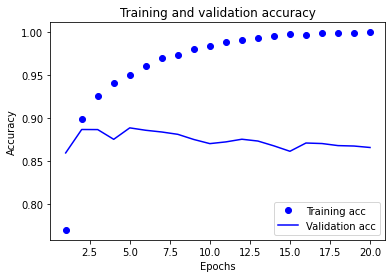

In [ ]:
#훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

네번째 Epochs부터 그래프가 역전되는듯 보임
훈련세트에서 잘 작동하는 모델이 처음 보는 데이터에서 잘 작동하지 않을수 있음
**과대적합** 된것으로 확인

In [18]:
#모델을 처음부터 재 훈련
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5481 - accuracy: 0.7514
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2682 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1941 - accuracy: 0.9358
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3031 - accuracy: 0.8812


In [19]:
#훈련된 모델로 새로운 데이터에대해 예측
model.predict(x_test)

array([[0.22651744],
       [0.99974227],
       [0.977293  ],
       ...,
       [0.12414524],
       [0.08690372],
       [0.7593943 ]], dtype=float32)